In [52]:
import os
import argparse
import os
import torch
from exp.exp_main import Exp_Main
import random
import numpy as np
from utils.tools import dotdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import os
import datetime
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

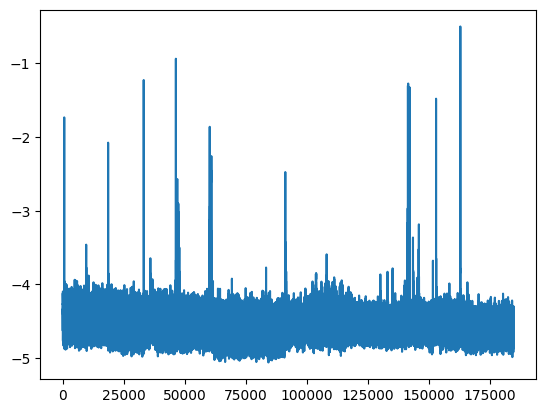

In [54]:
def get_ds(index,start_ts=0,step=120):
    index_tmp=index*step+start_ts
    date=datetime.datetime.fromtimestamp(index_tmp).strftime('%Y-%m-%d %H:%M:%S')
    date=pd.Timestamp(date)
    return date

def norm(value):
    # if value>0.05:
    #     return 0.05
    if value<0.005:
        return 0.0108-0.0023
    else:
        return value

df=pd.read_csv('datasets/data.csv')

df['index']=range(df.__len__())
df['date']=df['index'].map(get_ds)

# df['ts_norm']=df['index'].map(get_norm_time)

del df['index']
del df['id']

df['e_mu_current']=df['e_mu_current'].map(norm)

# df['OT']=np.log(df['OT'])
# df['e_nu_1']=np.log(df['e_nu_1'])
# df['e_nu_2']=np.log(df['e_nu_2'])
# df['q_mu']=np.log(df['q_mu'])
# df['q_nu1']=np.log(df['q_nu1'])
# df['q_nu2']=np.log(df['q_nu2'])
df['e_mu_current']=np.log(df['e_mu_current'])


# df['e_mu_current']=(df['e_mu_current']-np.mean(df['e_mu_current']))/np.std(df['e_mu_current'])

plt.plot(df['e_mu_current'])
plt.show()

In [9]:
print(np.max(np.exp(df['e_mu_current'])))
print(np.min(np.exp(df['e_mu_current'])))
print(np.mean((df['e_mu_current'])))
print(np.std(df['e_mu_current']))

1.0408107741923882
1.000180016200972
0.010835769867460102
0.002268160257378671


In [55]:
df.iloc[:-18485].to_csv('datasets/data_step=120_log_inf_train=0.9.csv',index=False,)
df.iloc[-18485:].to_csv('datasets/data_step=120_log_inf_test=0.1.csv',index=False,)

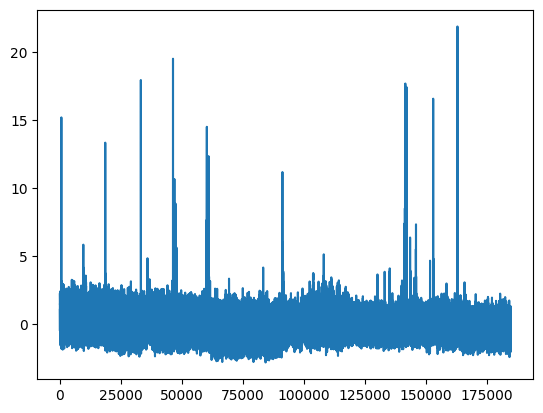

In [36]:
# df=pd.read_csv('datasets/data_step=60_train=0.9.csv')
plt.plot(df['e_mu_current'])
plt.show()

In [59]:

# fix_seed = 2021
# np.random.seed(fix_seed)
# torch.manual_seed(fix_seed)
# np.random.seed(fix_seed)

args = dotdict()
args.target = 'e_mu_current'
args.des = 'test'
args.dropout = 0.05
args.num_workers = 10
args.gpu = 0
args.lradj = 'type1'
args.devices = '0'
args.use_gpu = True
args.use_multi_gpu = False

args.freq = 't'
args.checkpoints = './checkpoints/'
args.bucket_size = 4
args.n_hashes = 4
args.is_trainging = True
args.root_path = './datasets/'
args.data_path ='data_step=60_log_inf_train=0.9.csv' 
args.model_id='qber_96_48_120_loginf_t'
args.model = 'Autoformer'
args.data = 'custom'
args.features = 'MS'
args.seq_len = 96
args.label_len = 48
args.pred_len = 1
args.e_layers = 6
args.d_layers = 6
args.n_heads = 8
args.factor = 3
args.enc_in = 6
args.dec_in =6
args.c_out = 6
args.d_model = 512
args.des = 'Exp'
args.itr = 1
args.d_ff = 2048
args.moving_avg = 25
args.factor = 1
args.distil = False
args.output_attention = True
args.patience= 3
args.learning_rate = 0.0001
args.batch_size = 64
args.embed = 'timeF'
args.activation = 'gelu'
args.use_amp = False
args.loss = 'mse'
args.train_epochs = 5

exp = Exp_Main(args)

Use GPU: cuda:0


In [60]:

setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.features,
    args.seq_len,
    args.label_len,
    args.pred_len,
    args.d_model,
    args.n_heads,
    args.e_layers,
    args.d_layers,
    args.d_ff,
    args.factor,
    args.embed,
    args.distil,
    args.des, 0)
print(setting)

qber_96_48_120_loginf_t_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0


train 116359
val 16637
test 33273
	iters: 100, epoch: 1 | loss: 0.9288005
	speed: 0.3854s/iter; left time: 3465.0879s
	iters: 200, epoch: 1 | loss: 0.5026834
	speed: 0.1873s/iter; left time: 1664.9500s
	iters: 300, epoch: 1 | loss: 0.5463999
	speed: 0.1854s/iter; left time: 1629.9829s
	iters: 400, epoch: 1 | loss: 3.1546576
	speed: 0.1854s/iter; left time: 1611.6543s
	iters: 500, epoch: 1 | loss: 0.9557685
	speed: 0.1855s/iter; left time: 1593.8839s
	iters: 600, epoch: 1 | loss: 0.4040413
	speed: 0.1856s/iter; left time: 1575.6665s
	iters: 700, epoch: 1 | loss: 0.4331644
	speed: 0.1855s/iter; left time: 1556.9366s
	iters: 800, epoch: 1 | loss: 0.5569897
	speed: 0.1855s/iter; left time: 1538.2178s
	iters: 900, epoch: 1 | loss: 0.5975069
	speed: 0.1856s/iter; left time: 1519.9137s
	iters: 1000, epoch: 1 | loss: 0.6263477
	speed: 0.1855s/iter; left time: 1501.2803s
	iters: 1100, epoch: 1 | loss: 0.3389528
	speed: 0.1857s/iter; left time: 1484.1549s
	iters: 1200, epoch: 1 | loss: 0.4250433

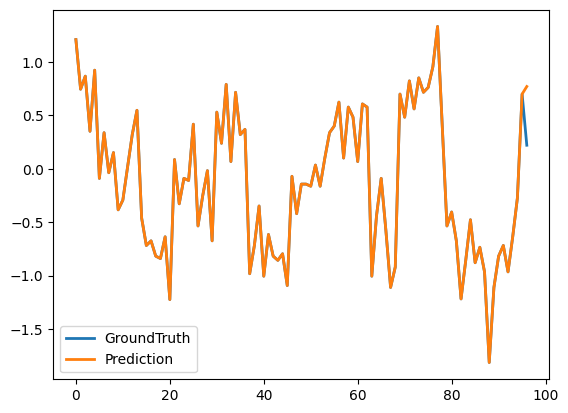

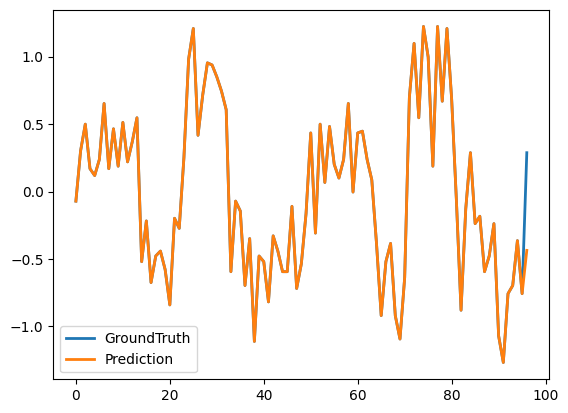

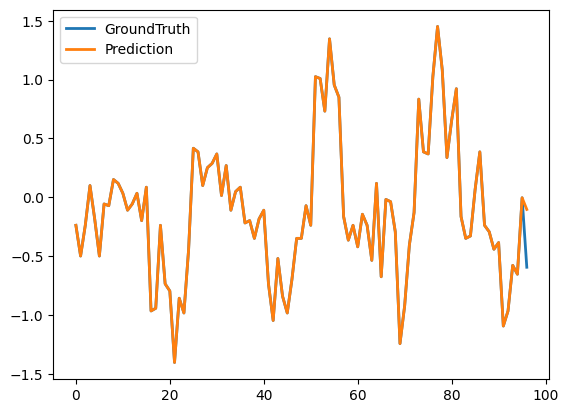

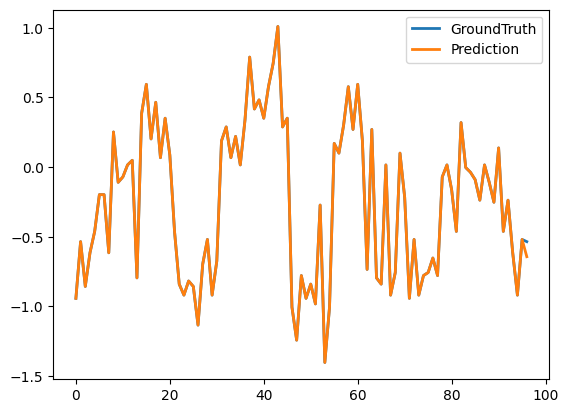

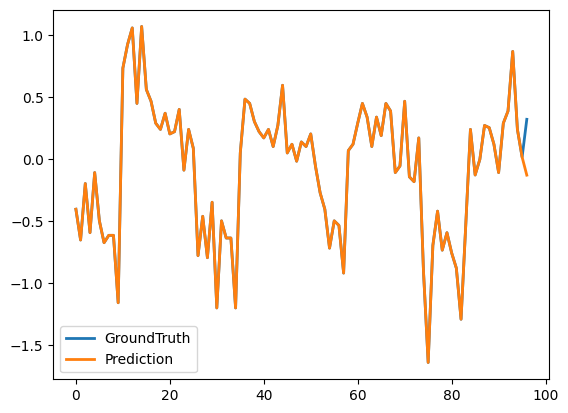

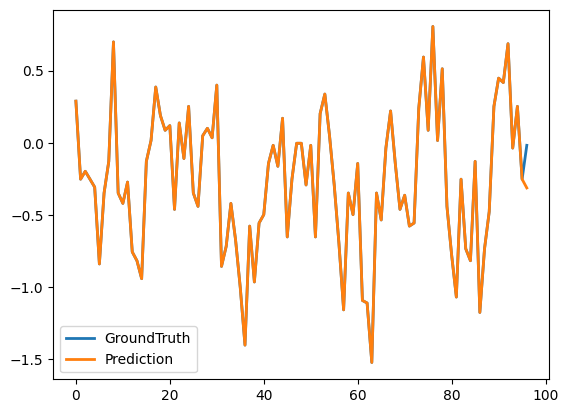

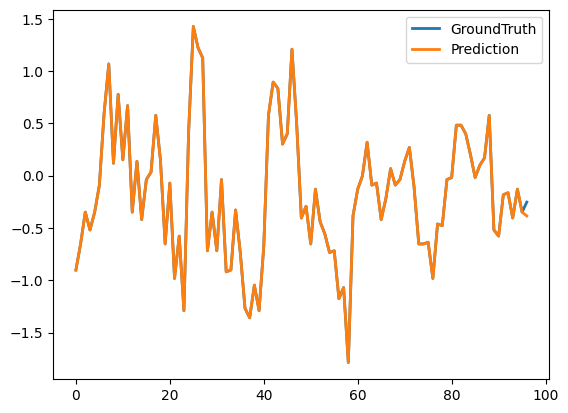

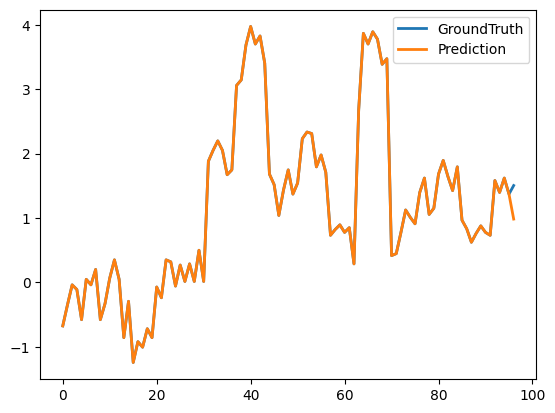

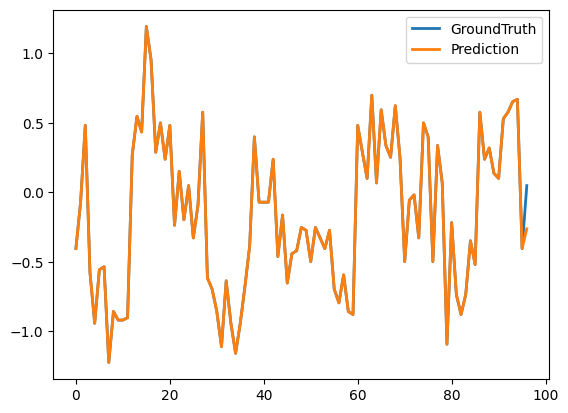

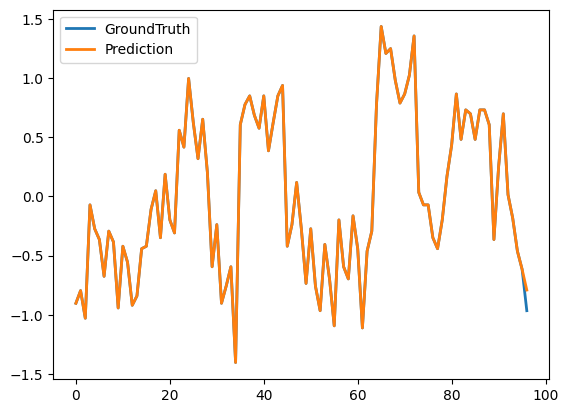

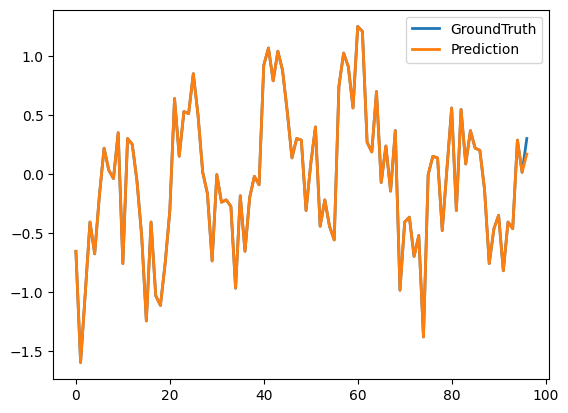

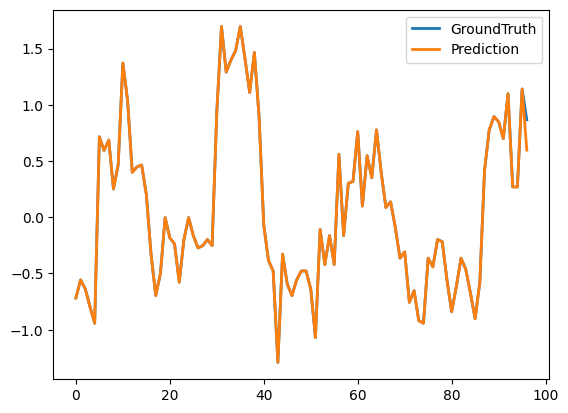

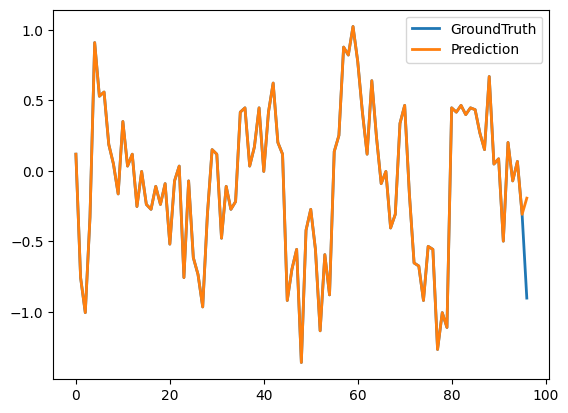

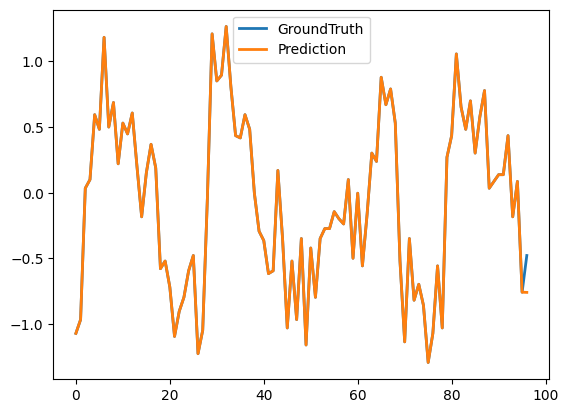

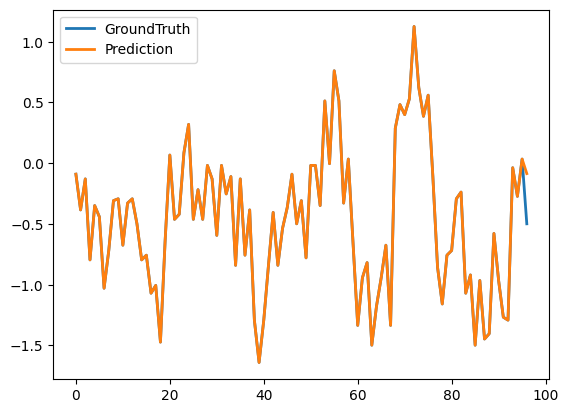

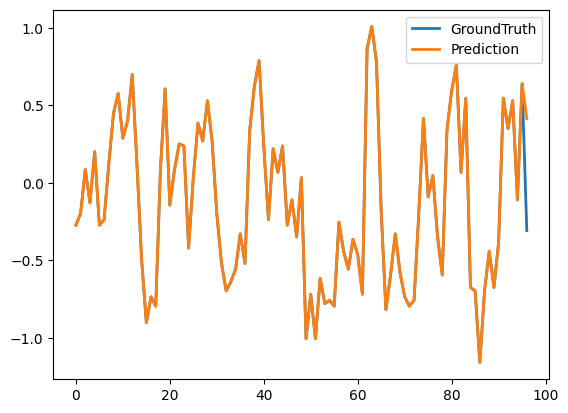

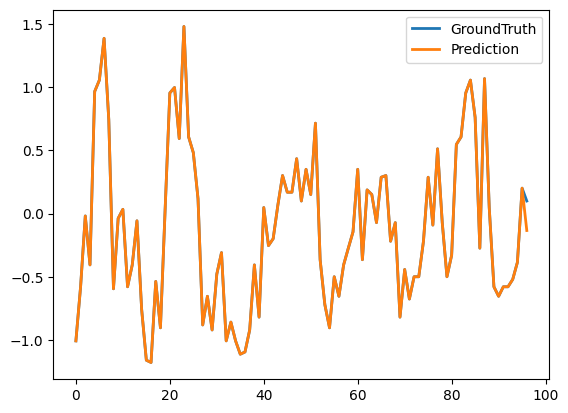

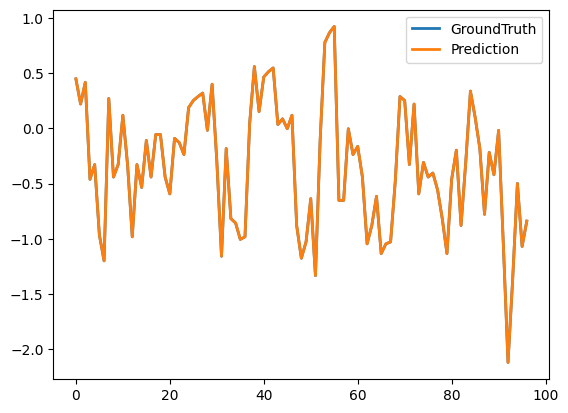

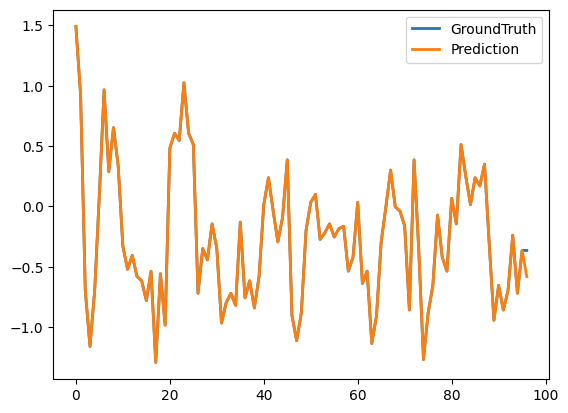

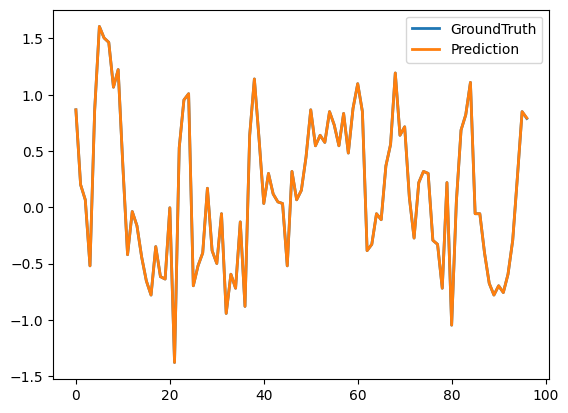

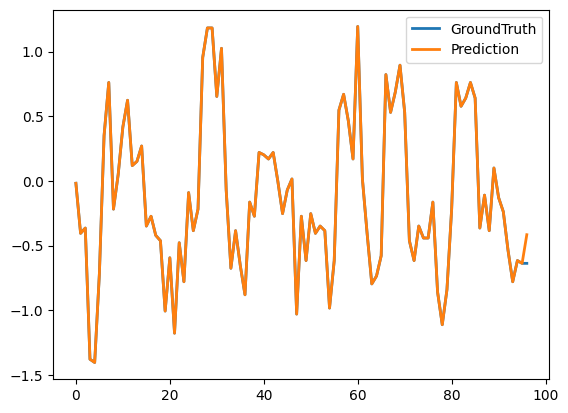

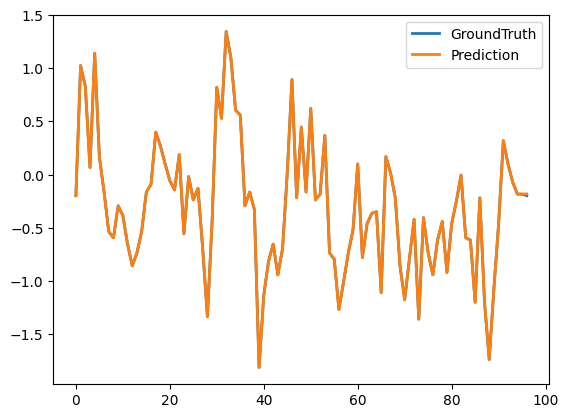

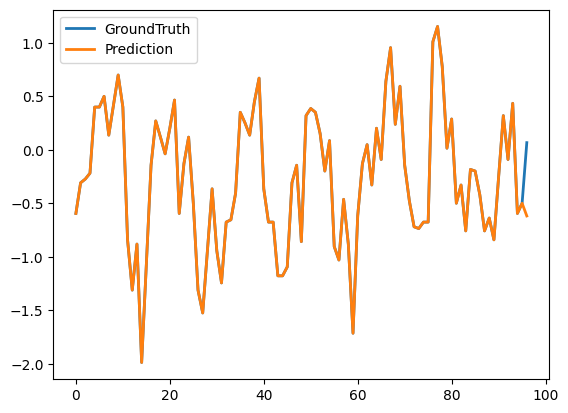

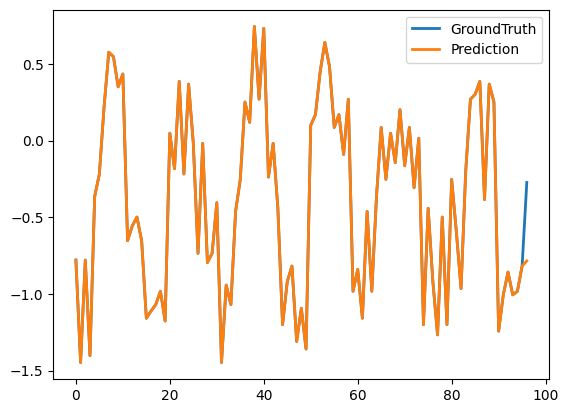

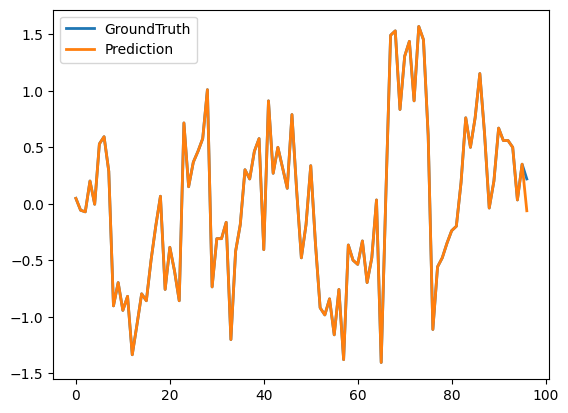

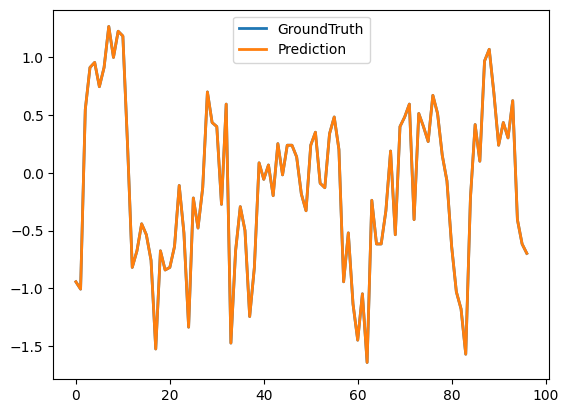

In [61]:
exp.train(setting)
exp.test(setting)

In [26]:
exp.args.root_path = './datasets/'
exp.args.data_path = 'data_step=60_test=0.1.csv'

prediction=exp.predict(setting, True)

2023-09-06:18:30:39,012 INFO     [exp_main.py:248] ./checkpoints/qber_96_48_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0/checkpoint.pth


pred 1


In [1]:
torch.cuda.empty_cache()


NameError: name 'torch' is not defined

In [62]:
# exp_name='qber_96_48_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0'
exp_name='qber_96_48_120_loginf_t_Autoformer_custom_ftMS_sl96_ll48_pl1_dm512_nh8_el6_dl6_df2048_fc1_ebtimeF_dtFalse_Exp_0'

data_pred = np.load(f'./results/{exp_name}/pred.npy')

data_true = np.load(f'./results/{exp_name}/true.npy')


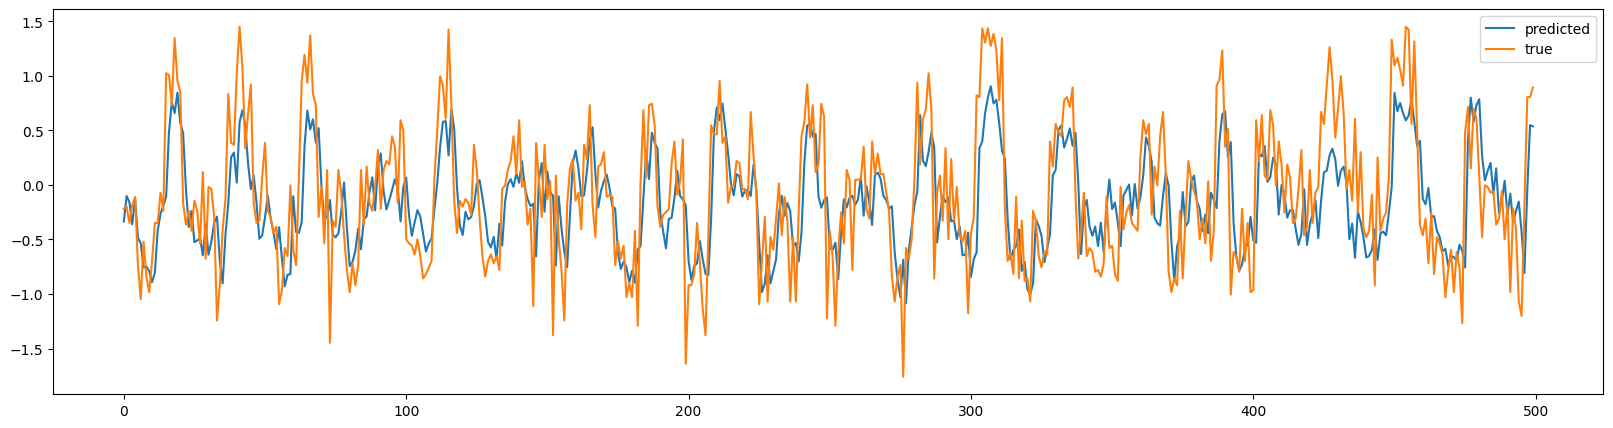

In [63]:
start=2500
end=3000
plt.figure(figsize=(20,5))
plt.plot(data_pred[start:end,0,0])
plt.plot(data_true[start:end,0,0])
plt.legend(['predicted','true'])
plt.show()

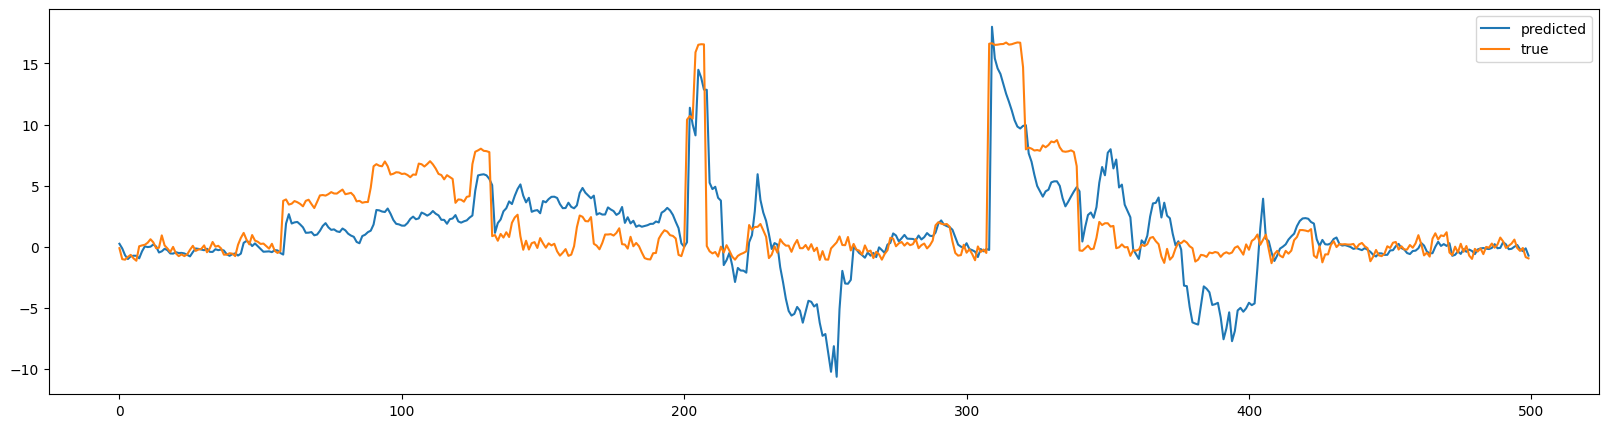

In [64]:
start=8200
end=8700
plt.figure(figsize=(20,5))
plt.plot(data_pred[start:end,0,0])
plt.plot(data_true[start:end,0,0])
plt.legend(['predicted','true'])
plt.show()